In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 40 kB/s 
     |████████████████████████████████| 199 kB 47.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=418703a3e63439cbd28b399a48ab6c0c63f21b517a24995596608f981fc308d7
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
# Import Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('spark').getOrCreate()

In [ ]:
from google.colab import files
upload = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [ ]:
df = spark.read.csv('Admission_Predict_Ver1.1.csv', inferSchema=True, header = True)
df.show()

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|         6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|         7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|         8|      308|        101|                2|3.0| 4.0| 7.9|    

In [ ]:
print((df.count(), len(df.columns)))
df.columns # Tha data has 500 rows, and 9 columns

(500, 9)


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
# Print schema
df.printSchema()

root
 |-- Serial No.: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [ ]:
# Get the summary statistics
df.describe().show()

+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|summary|       Serial No.|         GRE Score|      TOEFL Score|University Rating|               SOP|              LOR |              CGPA|          Research|   Chance of Admit |
+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|  count|              500|               500|              500|              500|               500|               500|               500|               500|                500|
|   mean|            250.5|           316.472|          107.192|            3.114|             3.374|             3.484| 8.576440000000003|              0.56| 0.7217399999999996|
| stddev|144.4818327679989|11.295148372354712|6.081867659564538|1.143511800759815|0.9910036207566072|0.92

In [ ]:
# Drop the nessesary columns
df = df.drop('Serial No.')
df.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|      302|        102|                1|2.0| 1.5| 8.0|       0|             0.5|
|      323|     

In [ ]:
# Check the Null values
for i in df.columns:
    print(i+':',df[df[i].isNull()].count())

GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR : 0
CGPA: 0
Research: 0
Chance of Admit : 0


In [ ]:
# Correlation analysis
for col in df.columns:
    print('Corellation to chance of admit col for {} is {}'.format(
          col, df.stat.corr('Chance of Admit ',col)))

Corellation to chance of admit col for GRE Score is 0.8103506354632598
Corellation to chance of admit col for TOEFL Score is 0.7922276143050823
Corellation to chance of admit col for University Rating is 0.6901323687886892
Corellation to chance of admit col for SOP is 0.6841365241316723
Corellation to chance of admit col for LOR  is 0.6453645135280112
Corellation to chance of admit col for CGPA is 0.882412574904574
Corellation to chance of admit col for Research is 0.5458710294711379
Corellation to chance of admit col for Chance of Admit  is 1.0


In [ ]:
# Feature selection
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['GRE Score','TOEFL Score','CGPA'],
                            outputCol='features')

# display dataframe
output_data = assembler.transform(df)
output_data.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |          features|
+---------+-----------+-----------------+---+----+----+--------+----------------+------------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|[337.0,118.0,9.65]|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|[324.0,107.0,8.87]|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72| [316.0,104.0,8.0]|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|[322.0,110.0,8.67]|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|[314.0,103.0,8.21]|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|[330.0,115.0,9.34]|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75| [321.0,10

Linear Regression

In [ ]:
# Import LinearRegression, and create final data
from pyspark.ml.regression import LinearRegression

final_data = output_data.select('features', 'Chance of Admit ')

# Print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [ ]:
# Split the data into training and testing set
train, test = final_data.randomSplit([0.7, 0.3])

In [ ]:
# Build and train the model
models = LinearRegression(featuresCol='features',labelCol='Chance of Admit ')
model = models.fit(train)

# Get summary of the model
summary = model.summary

# Print rmse & r2
print('\033[1m' + 'RMSE:',summary.rootMeanSquaredError)
print('R2 score:', summary.r2)
print('MSE', summary.meanSquaredError)
print('MAE: ', summary.meanAbsoluteError)

RMSE: 0.0623221981093246
R2 score: 0.8093084466093751
MSE 0.0038840563771779025
MAE:  0.04517286011610691


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats
import warnings

In [ ]:
df = df.toPandas()

In [ ]:
df.rename(columns={"Chance of Admit ":"Chance of Admit",
                  "LOR ":"LOR"},inplace=True)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int32  
 1   TOEFL Score        500 non-null    int32  
 2   University Rating  500 non-null    int32  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int32  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int32(4)
memory usage: 23.6 KB


In [ ]:
df.nunique().sort_values()

Research               2
University Rating      5
SOP                    9
LOR                    9
TOEFL Score           29
GRE Score             49
Chance of Admit       61
CGPA                 184
dtype: int64

In [ ]:
cat_columns = ['University Rating','SOP','LOR','Research']

In [ ]:
num_columns = list(set(df.columns) - set(cat_columns))
num_columns 

['GRE Score', 'CGPA', 'Chance of Admit', 'TOEFL Score']

In [ ]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in the dataset so we can skip that (treating null values) part. However, we will still have to check for outliers in the dataset (exclusing the dependant variable).

**Observing the Dependant variable**

Chance of Admit

In [ ]:
df['Chance of Admit'].head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [ ]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

Creating a new columns high chance to identify profiles who are most likely to get an admit.

In [ ]:
q3 = df['Chance of Admit'].quantile(q=0.75)
df['High Chance'] = df['Chance of Admit'].apply(lambda x: 1 if x>= q3 else 0)

Chance of Admit is a continuious numerical variable so we can use box plot, violin plot,histogram or density plot.

Let's observe a density plot below.

Skew range, current: -0.289966210041158
Skew range, log: -0.8153821572544562
Kurtosis, current: -0.4546817998465431
Kurtosis range, log: 0.5438283413897618


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


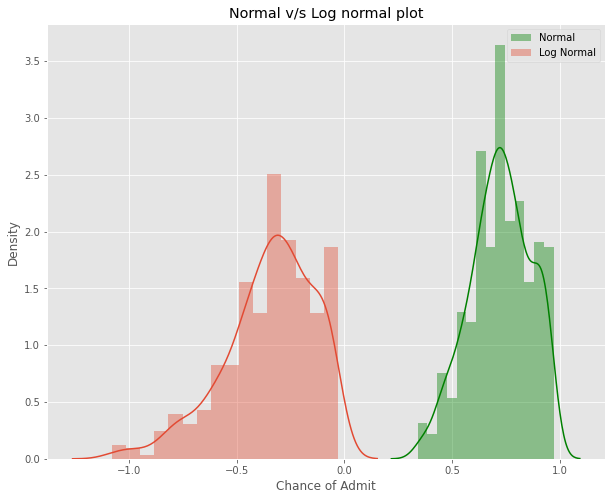

In [ ]:
y = df['Chance of Admit']
y_skew = y.skew()
ylog_skew = np.log(y).skew()
y_kurt = y.kurtosis()
ylog_kurt = np.log(y).kurtosis()
print('Skew range, current:',y_skew)
print('Skew range, log:',ylog_skew)
print('Kurtosis, current:',y_kurt)
print('Kurtosis range, log:',ylog_kurt)

plt.figure(figsize=(10,8));
plt.title('Normal v/s Log normal plot')
sns.distplot(y,color='g',label="Normal")
sns.distplot(np.log(y),label="Log Normal")
plt.legend()
plt.show()

Since the skew and kurtosis values are not improving with transformation, skipping the transformation as such.

**Observing the independant variables**

Categorical columns

In [ ]:
cat_columns

['University Rating', 'SOP', 'LOR', 'Research']

Checking and removing outliers in the categorical data.

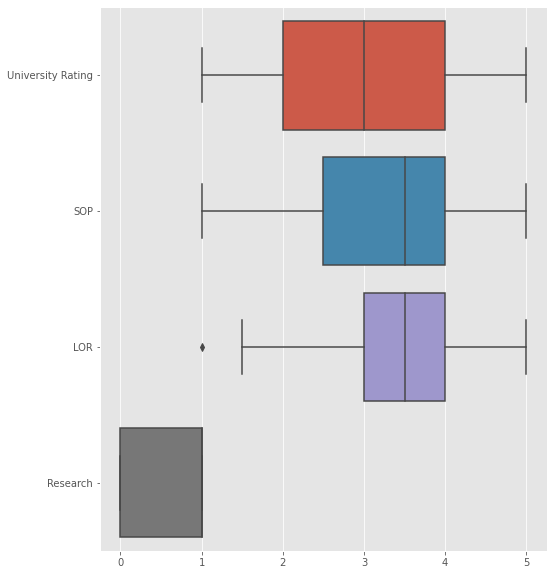

In [ ]:
n_cat_cols = len(cat_columns)
# fig,ax = plt.subplots(1,n_cat_cols,figsize=(8*n_cat_cols,6))
# for i,col_name in enumerate(cat_columns):
#     plt.subplot(ax[i])
plt.rcParams['figure.figsize'] = 8,10
sns.boxplot(data=df.loc[:,cat_columns],orient='h')
plt.show()   

An outlier was spotted only in the LOR column (in the left side of plot), we will treat that using IQR method.

In [ ]:
df.iloc[347]

GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.34
Research               0.00
Chance of Admit        0.42
High Chance            0.00
Name: 347, dtype: float64

In [ ]:
q1 = df['LOR'].quantile(q=0.25)
q3 = df['LOR'].quantile(q=0.75)

lower_limit = q1 - (q3-q1)*1.5
df['LOR'].loc[df['LOR'] < lower_limit] = np.NaN

# I checked the forward value and it is 2, so it will be safe to replace with forward fill
df['LOR'].fillna(method="ffill",inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


To get an idea of data distribution, lets check categorical columns.

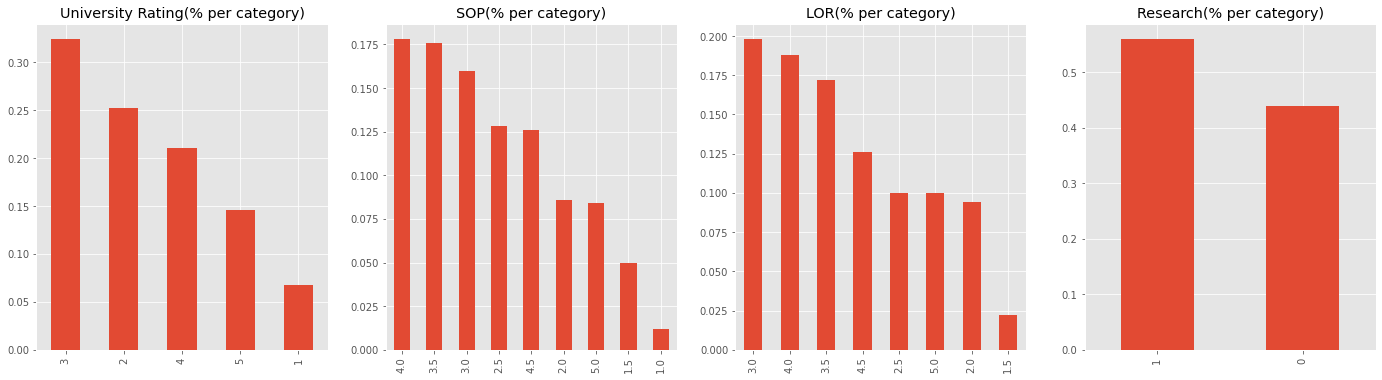

In [ ]:
fig,ax = plt.subplots(1,n_cat_cols,figsize=(6*n_cat_cols,6))

for i,col_name in enumerate(cat_columns):
    plt.subplot(ax[i])
    df[col_name].value_counts(normalize=True).plot.bar(title=col_name+"(% per category)")
plt.show()

GRE Score

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


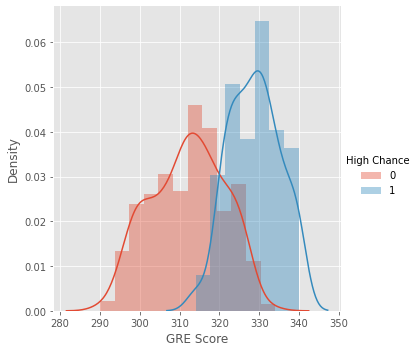

In [ ]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'GRE Score')\
    .add_legend()
plt.show()

TOEFL Score

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


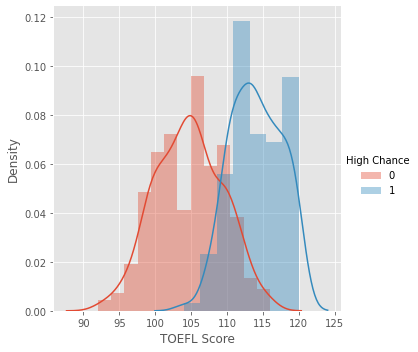

In [ ]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'TOEFL Score')\
    .add_legend()
plt.show()

CGPA

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


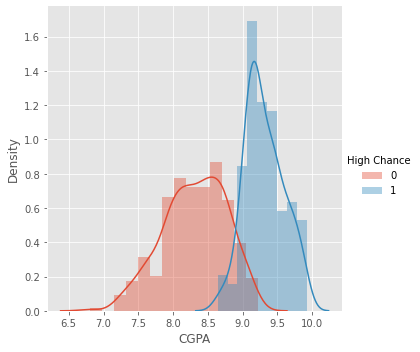

In [ ]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'CGPA')\
    .add_legend()
plt.show()